# Interpolation

Interpolation polynomial:



In [1]:
import  autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
import math
import tabulate as tab
import time as time

In [2]:
# Interpolation

def interpolate(x,y,z):    #x,y array of nodes, z(scalar) the evalutaion poiny

    k = len(x)
    thepoly = 0
    L = np.ones(k)
    
    
    for i in range(k):
        for j in range(k):
            #Computing the Lagrange basis functions
            if i!=j:
                L[i] *= (z-x[j])/(x[i]-x[j])
        #Value of interpolation polynomial at point z
        thepoly += L[i]*y[i]
    return thepoly  


#Creates an array of polynomial in interval I. Takes in interval, x-nodepoints, and the function
def interpolation_polynomial(I,nodes,f):
    
    value = np.zeros(len(I))

    for j in range(len(I)):
        value[j] = interpolate(nodes,f(nodes),I[j])
    
    return value  # Returns an array of the polynomial




# Node creation
def equallySpacesNodes(a,b,N): #Takes in start/end point, and desired amount of nodes
    return np.linspace(a,b,N)
    

def chebyshevNodes(a,b,N):  #Chebyshev nodes
    x_k = np.zeros(N)
    for j in range(1,N+1):
        x_k[j-1] = 0.5*(a+b) + 0.5*(b-a) * np.cos( ((2*j-1)/(2*N)) * np.pi )

    return x_k

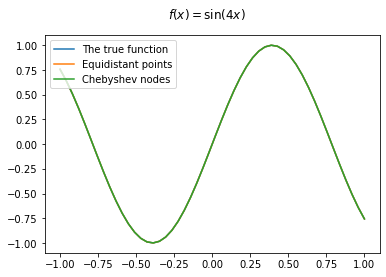

In [3]:
# Plotting smooth function

#X values for plotting
xValues = np.linspace(-1,1) 

def sin(t):
    return np.sin(4*t)

#Creating the y-list of the approximation with both equidistant and chebishev nodes
smoothEq = interpolation_polynomial(xValues,   equallySpacesNodes(-1,1,30),   sin)  
smoothCheb = interpolation_polynomial(xValues,   chebyshevNodes(-1,1,10),   sin)

# Plotting the figure
fig = plt.figure()
fig.suptitle('$f(x)=  \sin(4x)$')
ax = plt.subplot(111)
ax.plot(xValues,sin(xValues), label='The true function')
ax.plot(xValues,smoothEq,label='Equidistant points')
ax.plot(xValues,smoothCheb,label = 'Chebyshev nodes')
ax.legend()


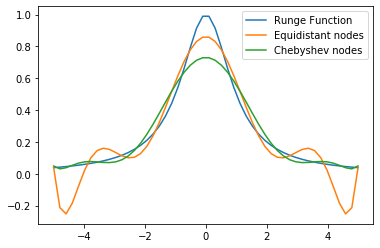

In [4]:
# Plotting Runge function

#Runge function 

def rungefct(t):
    return 1/(1+t**2)

# x values for plotting
xValues = np.linspace(-5,5)

#Creating y-list for plotting the approximations 
rungeEqui = interpolation_polynomial(xValues,  equallySpacesNodes(-5,5,10),  rungefct)
rungeCheb = interpolation_polynomial(xValues,  chebyshevNodes(-5,5,10),  rungefct)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(xValues,rungefct(xValues),label='Runge Function')
ax.plot(xValues,rungeEqui,label = 'Equidistant nodes')
ax.plot(xValues,rungeCheb, label = 'Chebyshev nodes')
ax.legend()

# Part b)



In [5]:
#Functions and norm approximations

def cos(t):
    return np.cos(2*np.pi*t)

def esin(t): #exp(3x)sin(2x)
    return np.exp(3*t)*np.sin(2*t)

def maxNormApprox(f):
    return np.amax(np.abs(f))


def twoNormApprox(g, a, b):
    const = (b - a) / len(g)
    G = 0
    
    for j in range(len(g)):
        G += g[j]**2
    
    return np.sqrt(const * G)



In [6]:
# Error plots

#Takes in node amount, function and interval start and endpoints
#Plots the error/nodeamount
def plotMaxError(nmax, f, a, b, plotbound):   #Plotbound = True for plotting theorized error bound
    
    gridSize = 100*nmax
    interval = np.linspace(a,b,gridSize)  #Approximating the interval with a grid
    
    def bound(nMax): #Derived error bound fucntion
    
        n = np.arange(nMax)[1:]
        y = np.zeros(nMax)[1:]

        for j in range(1,nMax):
            y[j-1] = (2*np.pi)**(j+1) / (2**(j+1)*math.factorial(j+1))

        return n,y
    
    
    #Setting up some lists
    n_list = np.arange(nmax)[1:]
    error_list = np.zeros(nmax)[1:]
    error_list2 = np.zeros(nmax)[1:]
    
    #Creating the approximation lists and calculating the error in both nodetypes
    for i in range(1,nmax):
        p_n = interpolation_polynomial(interval,equallySpacesNodes(a,b, i),f) 
        p2_n = interpolation_polynomial(interval,chebyshevNodes(a,b,i),f)
        
        
        error_list[i-1] = maxNormApprox((f(interval)-p_n)) #Storing equidistant node error
        error_list2[i-1] = maxNormApprox(f(interval)-p2_n) #Storing chebishev node error
        
        
        
    errBound = bound(nmax) #For plotting the bound in the plot
    
    
    #Plotting
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.semilogy(n_list, error_list, 'ro',label='Equidistant nodes')
    ax.semilogy(n_list, error_list2, 'o',label='Chebyshev nodes')
    if plotbound == True:
        ax.semilogy(errBound[0],errBound[1], 'go', label='Error bound')
    ax.set_xlabel('$n$, Amount of Nodes')
    ax.set_ylabel('$||f-p_n||_\infty$')
    ax.set_title('Max norm '+f.__name__)
    ax.legend()
    
    
    return error_list, error_list2
    
def plotTwoError(nmax,f,a,b):
    
    gridSize = 100*nmax
    interval = np.linspace(a,b,gridSize)  #Values of x
    
    
    n_list = np.arange(nmax)[1:]
    error_list = np.zeros(nmax)[1:]
    error_list2 = np.zeros(nmax)[1:]
    for i in range(1,nmax):
        p_n = interpolation_polynomial(interval, equallySpacesNodes(a,b, i), f) 
        p2_n = interpolation_polynomial(interval, chebyshevNodes(a,b, i), f)

        error_list[i-1] = twoNormApprox(f(interval)-p_n, a,b)   #Storing equidistant node error
        error_list2[i-1] = twoNormApprox(f(interval)-p2_n, a,b)   #Storing chebishev node error
        
    
    
    
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.semilogy(n_list, error_list, 'ro',label='Equidistant nodes')
    ax.semilogy(n_list, error_list2, 'o',label='Chebyshev nodes')
    ax.set_xlabel('$n$, Amount of Nodes')
    ax.set_ylabel('$||f-p_n||_2$')
    ax.set_title('2-norm '+f.__name__)
    ax.legend()
    
    return error_list, error_list2
    
plotMaxError(25,esin,0,np.pi/4, False)
plotTwoError(25,esin,0,np.pi/4)

plotMaxError(25,cos,0,1,True)
plotTwoError(25,cos,0,1)




# Part c)

In [7]:

def subdivideInterval(a,b,K): #Subdivides a given interval between a and b by K
    
    subint = np.zeros(K)
    subint[0] = a
    for t in range(1,K):
        subint[t] = subint[t-1] + ((b-a)/(K-1))
        
    
    return subint
    
def subdividePoly(a,b,n,f,K):
    
    subIntervals = subdivideInterval(a,b,K) 
    gridSize = 100*n
    
    polynomials = [] #To store subpolynomials
    
    error_list = np.zeros(K-1) 
    for u in range(K-1):
        subI = np.linspace(subIntervals[u],subIntervals[u+1],gridSize) 
        subNodes = equallySpacesNodes(subIntervals[u],subIntervals[u+1],n+1)
        #Creates subintervals and nodes on those intervals
        
        polynomials.append(interpolation_polynomial(subI,subNodes,f))   #Storing subpolynomials
        
        error_list[u] = maxNormApprox((f(subI)-polynomials[u]))
    
#     plt.plot(subI,polynomials[u])  #This plots the entire function in interval
        
    return error_list




def subdividePlot(a,b,n,f,K): #To plot error as a function of K
    
    theList = np.zeros(K)
    Klist = np.arange(K)
    
    
    for t in range(2,K):
        theList[t] = maxNormApprox(subdividePoly(a,b,n,f,t))
        
    
    plt.semilogy(Klist,theList,'o',label='n='+str(n))
    
def plotK(v):
    for qw in range(1,11):
        subdividePlot(0,1, qw, cos, v)
        plt.legend()
        plt.xlabel('K, Number of subintervals')
        plt.ylabel('$||f-p_n||_\infty$')
        
plotK(15)

\begin{tabular}{lr}
\hline
 Piecewise     & 0.0235542 \\
 Not piecewise & 0.262186  \\
\hline
\end{tabular}
[ 5. 10. 15. 20.  0.]


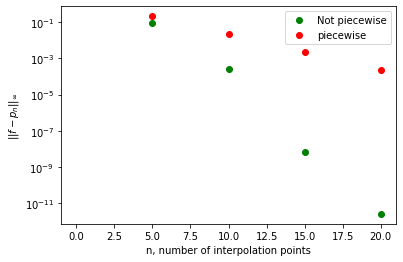

In [32]:
# Computing run-time of piecewise method vs straight computation
listTime = []

start = time.perf_counter() 
piecewise = subdividePoly(0,1,3,cos,5)  #Piecewise method on cos(2pi x), [0,1],  with n_pw=3 K=5
end = time.perf_counter()
listTime.append(['Piecewise',end-start])



inter = np.linspace(0,1,100*3*5)   #Interval approx with gridSize = 100*K*(n_pw)
nod = np.linspace(0,1,3*5)

start = time.perf_counter()
notPiecewise = interpolation_polynomial(inter,nod,cos)
end = time.perf_counter()

listTime.append(['Not piecewise', end-start])

print(tab.tabulate(listTime,tablefmt='latex'))

#Plotting error norms for piecewise and non-piecewise
def plottingNorms():
    K = 5
    notpwList = np.zeros(K)
    pwList = np.zeros(K)
    
    plotList = np.zeros(K)
    for j in range(1,K):
        plotList[j-1] = j*K
        nod = np.linspace(0,1,j*K)
        inter = np.linspace(0,1,100*j)
        notpwList[j-1] = maxNormApprox(cos(inter) - interpolation_polynomial(inter,nod,cos))
        pwList[j-1] = maxNormApprox(subdividePoly(0,1,j,cos,K))
        
    plt.semilogy(plotList,notpwList,'go', label='Not piecewise')
    plt.semilogy(plotList,pwList,'ro',label='piecewise')
    plt.xlabel('n, number of interpolation points')
    plt.ylabel('$||f-p_n||_\infty$')
    plt.legend()
    print(plotList)
                                     
plottingNorms()

# Part d)

In [9]:
# Function to fix Arraybox problems 

def interpolate_autograd(x,y,z):
    k = len(x)
    thepoly = 0
    L = np.ones(k)
    for i in range(k):
        for j in range(k):
            if i!=j:
                L[i] *= (z-x[j]._value)/(x[i]._value-x[j]._value)
        thepoly += L[i]*y[i]
    return thepoly   #Value of polynomial at z

In [10]:
# Cost function
def C(x):   #R^(n+1) --> R   vector of nodes [x_0,...,x_n] to R
    
    const = (endval - startval) / N # Constant 
    val = 0
    
    f = cos
    
    
    #If statement because of trouble with arrayboxes
    if isinstance(x,np.ndarray)==True:
        for k in range(N):
            val += (f(xinterval[k]) - interpolate(x,f(x),xinterval[k]))**2
    else:
        for k in range(N):
            val += (f(xinterval[k]) - interpolate_autograd(x,f(x),xinterval[k]))**2
            
            
    
    return const*val


In [19]:
#Gradient decsent with backtracking
#Set plotvar = True for plotting conv. hist

def grad_des_back(func, x0, L, P, p, TOL = 1e-20, maxIter = 2000, plotvar = False): 
    
    nabla = grad(func)
    phi = func(x0)
    
    current_x = x0
    print(current_x)
    
    
    conv_history = []
    
    for k in range(maxIter):
        
        g = nabla(current_x)
        
        for t in range(maxIter):
            next_x = current_x - (g/L)
            phi_tilde = func(next_x)
            step = next_x - current_x
            
            
            
            conv_history.append(phi)
            print(np.linalg.norm(step))


            if phi_tilde <= (phi + np.inner(g,step) +(L/2)*(np.linalg.norm(step)**2)):
                #print('we in here')
                current_x = next_x
                phi = phi_tilde
                L = p*L
                break
                
            else:
                L=P*L
#                 print(L)
                
        
        if np.linalg.norm(step)<= TOL:
            print('reached tol at',k+1, 'iterations')
            break
            
    if plotvar == True:
        plt.semilogy(conv_history,label = 'n='+str(len(next_x)))
        plt.legend()
        plt.xlabel('Iterantion number')
        plt.ylabel('$C(x_k)$')
                
    return next_x





In [27]:
#Global variables to use from here on out. Declearing globally because of use of autograd package. It's convenient

startval = 0 # Start of interval 
endval = 1 # End of interval
f = cos #The function we want to approximate
N = 1000 # Amount of known points in interval
xinterval = np.linspace(startval,endval,N) #An approximation of interval with N points


def find_optimal_nodes():

    optimalNodes = []
    theNodevectors = []

    start = time.perf_counter() # Timing runtime
    for km in range(4):
        numb = 2+2*km # Number of nodepoints
        nodepoints = equallySpacesNodes(startval, endval, numb) # Equally spaced nodes in interval
        theNodevectors.append(nodepoints)
        optimalNodes.append(grad_des_back(C,nodepoints,10,1.1,0.9))
    end = time.perf_counter()

    print('Time:', end-start)
    
    #Printing 2-norm values for different node types for latex-report f

    C_list = []



    for r in range(len(optimalNodes)):
        C_list.append([2+2*r,C(optimalNodes[r]),C(theNodevectors[r]),C(chebyshevNodes(startval,endval, 2+2*r))])
        print('\n','Optimal Nodes for n = '+str(2+2*r), optimalNodes[r],'\n')
    #Creating table of values   
    print(tab.tabulate(C_list, headers = ['n','Optimal','equidistant','Chebyshev'], tablefmt='latex'))  
    


find_optimal_nodes()

[0. 1.]
1.1102230246251565e-16
we in here
7.771561172376096e-16
we in here
4.3298697960381105e-15
we in here
2.853273173286652e-14
we in here
2.0328183580886616e-13
we in here
1.5836221223253233e-12
we in here
1.3511858298898005e-11
we in here
1.264278681745168e-10
we in here
1.298794072290832e-09
we in here
1.4664671699193832e-08
we in here
1.8216585095931492e-07
we in here
2.491822329475646e-06
we in here
3.7565021343000105e-05
we in here
0.000624613174462052
we in here
0.011469665761672188
we in here
0.2346056506156302
we in here
0.5924957540210584
0.5386325036555075
0.48966591241409774
0.4451508294673615
0.40468257224305587
0.3678932474936871
0.3344484068124428
0.30404400619312977
0.27640364199375433
0.2512760381761403
0.2284327619783093
0.20766614725300847
0.188787406593644
0.1716249150851309
0.1560226500773917
0.1418387727976288
0.12894433890693535
0.11722212627903206
0.10656556934457462
0.09687779031324961
0.08807071846659054
0.08006428951508227
0.07278571774098386
0.06616883430

# Part e)


In [13]:
# Global variables decleared later on
def ftilde(x, f, epsilon, zeta):
    
    def phi(r):   # R -> R
        if isinstance(epsilon, float) == True or isinstance(epsilon, int) == True: #workaround of matrix shenanigans
            return 1 / np.exp((epsilon*r)**2)
        else:
            return 1 / np.exp((epsilon._value*r)**2)
        
    n = len(x)
    def matrix_(n):
        M = np.zeros((n,n))   #Empty matrix  
        for i in range(n):  #Filling with nodevalues 
            for j in range(n):
                M[i][j] = phi( np.abs(x[i] - x[j]) )      
        return M
    
    def matrix_autograd(n):
        M = np.zeros((n,n))   #Empty matrix  
        for i in range(n):  #Filling with nodevalues 
            for j in range(n):
                M[i][j] = phi( np.abs(x[i]._value - x[j]._value) )      
        return M
    
    def linearSolve(A, f_vec):  #
        Ainv = np.linalg.inv(A)
        return np.dot(Ainv, f_vec)

    
    f_val = f(x)
    
    if isinstance (x, np.ndarray) == True:  #workaround of autograd array error
        phiMatrix = matrix_(n)
    else:
        phiMatrix = matrix_autograd(n)
    
    
    w = linearSolve(phiMatrix, f_val) 
    val = 0
    for k in range(n):
        val += w[k]*phi(np.abs(zeta - x[k]))
    
    
    return val

In [14]:
def Runge(x):
    return (1/(x**2 + 1))

def f_2(x):
    return (3/4)*(np.exp((-(9*x - 2)**2)/4) + np.exp((-(9*x + 1)**2)/49)) + (1/2)*(np.exp((-(9*x - 7)**2)/4)) - (1/10)*(np.exp(-(9*x - 4)**2))


In [17]:

def C2(x):  #R^(n+1) --> R   vector of nodes [x_0,...,x_n, epsilon] to R. For optimizing cost with epsilon
    N = 1000
    const = (b - a) / N
    interval = np.linspace(a, b, N)

    f = function
    val = 0

    for q in range(len(x) - 1):
        val += (f(interval[q]) - ftilde(x[0:-1], f, x[-1], interval[q]))**2
        

    return const*val


def plotTwoError_ftilde(nmax, f, a, b, cost_function, optimized): #Optimize = 'yay' for optimal nodes, else use equidistant
    
    gridSize = 100*nmax
    
    interval = np.linspace(a, b, gridSize)
    
    #Declearing lists
    n_list = np.arange(1, nmax + 1)
    m_list = np.linspace(a, b, gridSize)
    error_list = np.zeros(nmax)
    error_list2 = np.zeros(nmax)
    
    
    for i in range(nmax):
        
        #Creating interpolation poly
        p_n = interpolation_polynomial(interval, equallySpacesNodes(a,b,i), f) 
        error_list[i] = twoNormApprox((f(interval)-p_n), a, b)

        if (optimized == 'yay'): #Using gradient descent for nodefinding
            plot_points = np.linspace(a, b, i + 1)
            plot_points = np.append(plot_points, epsilon)
            super_points = grad_des_back(cost_function, plot_points, L, P, p, TOL, maxIter)
            p2_n = ftilde(super_points[0:-1], f, plot_points[-1], m_list) 
            error_list2[i] = twoNormApprox(f(interval)-p2_n, a, b)

        else:
            plot_points = np.linspace(a, b, i + 1)
            p2_n = ftilde(plot_points, f, epsilon, m_list) 
            error_list2[i] = twoNormApprox(f(interval)-p2_n, a, b)

    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(n_list, error_list, 'ro',label='Interpolation')
    ax.plot(n_list, error_list2, 'o',label='Radial basis')
    ax.legend()


[-1.  1.  2.]
2.88281309823836e-07
we in here
5.763971768770774e-07
we in here
1.1521327729640036e-06
we in here
2.3016207474366816e-06
we in here
4.592674491711982e-06
we in here
9.14317838418911e-06
we in here
1.8118451852296287e-05
we in here
3.557147482215195e-05
we in here
6.853029760170338e-05
we in here
0.000126995163820359
we in here
0.00021669503141550018
we in here
0.00030617272394207833
we in here
0.00025310294919667184
0.00012655147459833592
we in here
0.00010470329434991966
5.235164717501534e-05
we in here
4.3328546191084036e-05
2.1664273095486507e-05
we in here
1.7932892372431748e-05
8.966446186215874e-06
we in here
7.422538100757181e-06
3.7112690503230792e-06
we in here
3.072311453773443e-06
1.5361557268867214e-06
we in here
1.2716935785079318e-06
6.358467893094771e-07
we in here
5.263826332175003e-07
2.63191316608748e-07
we in here
2.178820172653449e-07
1.089410086881836e-07
we in here
9.018650219900729e-08
4.5093251155014794e-08
we in here
3.733033382965257e-08
1.86651

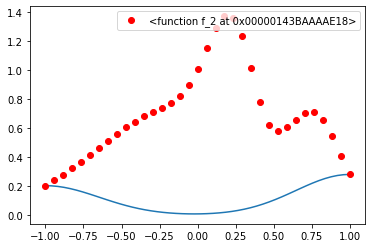

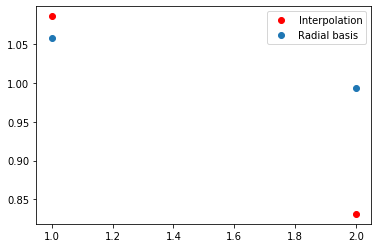

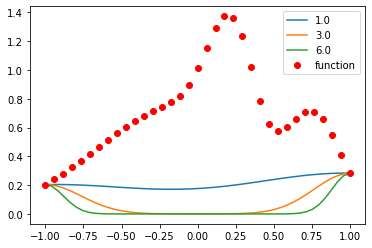

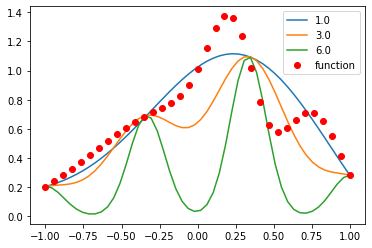

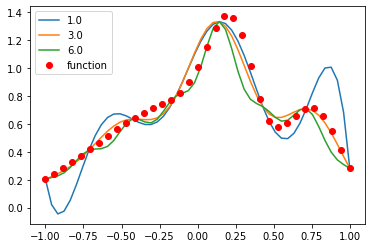

In [20]:
n = 2                                 #Global value for nodes
epsilon = 2                              #Global initial value for epsilon
a = -1                                     #Starvalue of interval
b = 1                                      #Endvalue of interval
x = np.linspace(a, b, n)                   #Set of nodes
x_new = np.append(x, epsilon)              #Set of nodes with optimizable epsilon
plot_precision = np.linspace(a, b, 50)     #Precision of plot
plot_precision2 = np.linspace(a, b, 35)    #Precision of reference plot of actual function

tau = 0.1                                  #OUTDATET, old tau
TOL=1e-15                                  #Precision of estimation (Tolerance level)
maxIter = 1000                             #Maximum number of iterations
L = 10                                     #Variable deciding new Tau
P = 2                                      #Upper roh
p = 0.5                                    #Lower roh
function = f_2                            #Function we wish to estimate (f_2 or Runge)
cost_function = C2                         #Global cost function (C=OUTDATET and C2)

n_cycle = np.array([2, 4, 8])              #Computing optimal nodes for increasing values of n
e_cycle = np.array([1, 3, 6])              #Initial values of epsilon for n_cycle computation

optimized = 'nay'                          #Plots error of RBF against interpolation on equidistance nodes
                                           #with optimized nodes (yay or nay)



def plot_the_stuff(x, function, L, P, p, TOL, maxIter, cost_function, plot_precision, plot_precision2, a ,b, n_cycle, e_cycle):
    
    #Plots single function by spesifications given above
    super_points = grad_des_back(C2, x_new, L, P, p, TOL, maxIter)
    uber_points = ftilde(super_points[0:-1], function, super_points[-1], plot_precision)  
    
    f_values=np.zeros(len(plot_precision2))
    for i in range(len(f_values)):
        f_values[i] = function(plot_precision2[i])
    
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(plot_precision, uber_points)
    ax.plot(plot_precision2, f_values, 'ro', label = function)
    ax.legend()
    
    #The two norm error compared with interpolation on equidistant nodes of increasing value up to n. Epsilon fixed at: epsilon
    plotTwoError_ftilde(n, function, a, b, cost_function, optimized)
    
    #Optimizing over n and epsilon, with increasing values of n and epsilon
    for i in n_cycle:
        graph_plot = []
        for j in e_cycle:
            plot_points = np.linspace(a, b, i)
            plot_points = np.append(plot_points, j)
            super_points = grad_des_back(cost_function, plot_points, L, P, p, TOL, maxIter)
            q = ftilde(super_points[0:-1], function, super_points[-1], plot_precision)
            graph_plot.append(q)
            
        
        graph_plot = np.asarray(graph_plot) 
        
        fig = plt.figure()
        ax = plt.subplot(111)
        for k in range(len(graph_plot)):
            ax.plot(plot_precision, graph_plot[k], label = (k*2 + (1 + k*(k-1)*1/2)))
        ax.plot(plot_precision2, f_values, 'ro', label = 'function')
        ax.legend()
    
    
plot_the_stuff(x_new, function, L, P, p, TOL, maxIter, cost_function, plot_precision, plot_precision2, a, b, n_cycle, e_cycle)